In [0]:
import os

In [0]:
#!pip install pydrive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#os.chdir('drive/My Drive/py-codes/')

In [3]:
os.getcwd()

'/content'

In [5]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes.csv


{'diabetes.csv': b'\xef\xbb\xbfPregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,3

In [0]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import fancyimpute
from fancyimpute import KNN
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor
import xgboost as xgb

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

In [0]:
training = pd.read_csv('diabetes.csv')

In [0]:
training

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [0]:
training.shape

(768, 9)

In [0]:
training.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [0]:
training.describe

<bound method NDFrame.describe of      Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]>

In [0]:
training['Pregnancies']

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [0]:
training['Glucose']

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 768, dtype: int64

In [0]:
training['BloodPressure']

0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64

In [0]:
training['SkinThickness']

0      35
1      29
2       0
3      23
4      35
       ..
763    48
764    27
765    23
766     0
767    31
Name: SkinThickness, Length: 768, dtype: int64

In [0]:
training['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [0]:
training['BMI']

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [0]:
training['DiabetesPedigreeFunction']

0      0.627
1      0.351
2      0.672
3      0.167
4      2.288
       ...  
763    0.171
764    0.340
765    0.245
766    0.349
767    0.315
Name: DiabetesPedigreeFunction, Length: 768, dtype: float64

In [0]:
training['Age']

0      50
1      31
2      32
3      21
4      33
       ..
763    63
764    27
765    30
766    47
767    23
Name: Age, Length: 768, dtype: int64

In [0]:
training['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

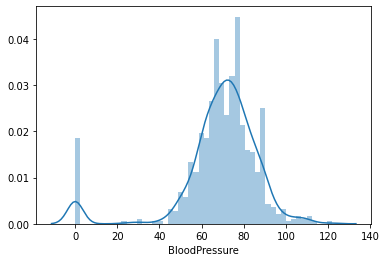

In [0]:
plot_BP = sns.distplot(training['BloodPressure'],bins=50)

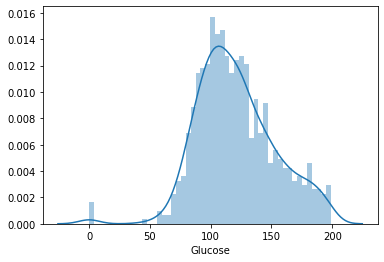

In [0]:
plot_Gluc = sns.distplot(training['Glucose'],bins=50)

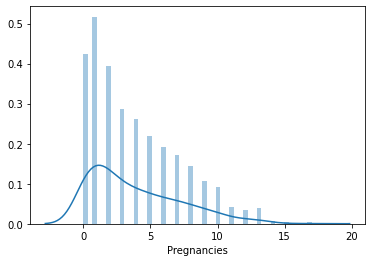

In [0]:
plot_preg = sns.distplot(training['Pregnancies'],bins=50)

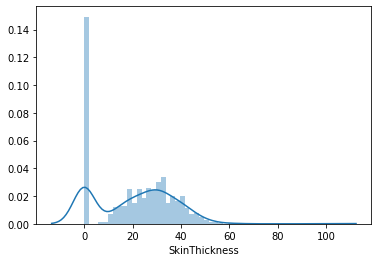

In [0]:
plot_Skin = sns.distplot(training['SkinThickness'],bins=50)

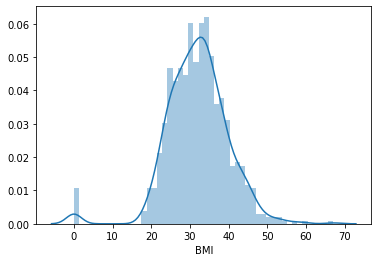

In [0]:
plot_BMI= sns.distplot(training['BMI'],bins=50)

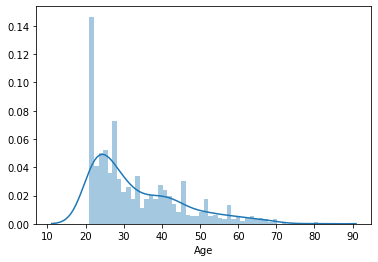

In [0]:
plot_Age = sns.distplot(training['Age'],bins=50)

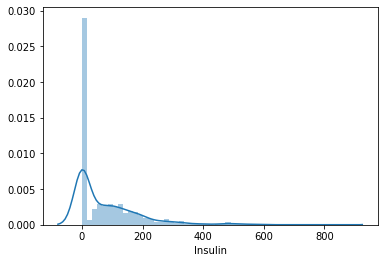

In [0]:
plot_ins = sns.distplot(training['Insulin'],bins=50)

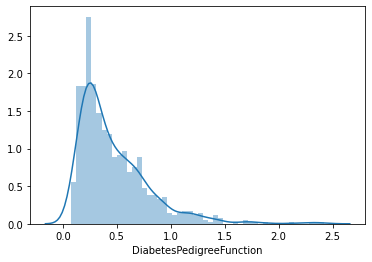

In [0]:
plot_DPF = sns.distplot(training['DiabetesPedigreeFunction'],bins=50)

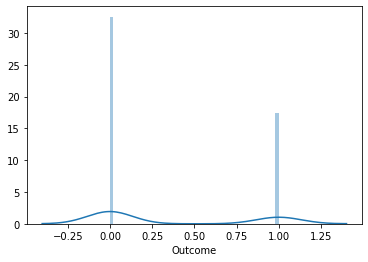

In [0]:
plot_out = sns.distplot(training['Outcome'],bins=50)

In [0]:
training = training.drop(training[training['SkinThickness']==0].index, axis=0)

In [0]:
training.shape

(541, 9)

In [0]:
training = training.drop(training[training['BMI']==0].index, axis=0)

In [0]:
training.shape

(539, 9)

In [0]:
training = training.drop(training[training['Age']==0].index, axis=0)

In [0]:
training.shape

(539, 9)

MISSING VALUE ANALYSIS

In [0]:
###### MISSING VALUE ANALYSIS

In [0]:
mising_value = pd.DataFrame(training.isnull().sum())

In [0]:
mising_value

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [0]:
###### NO Missing Values found

In [0]:
##### OUTLIER ANALYSIS

OUTLIER ANALYSIS


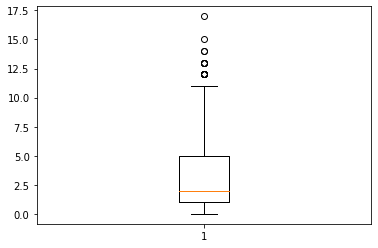

In [0]:
out_preg=plt.boxplot(training['Pregnancies'])

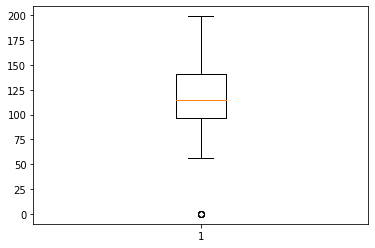

In [0]:
out_gluc=plt.boxplot(training['Glucose'])

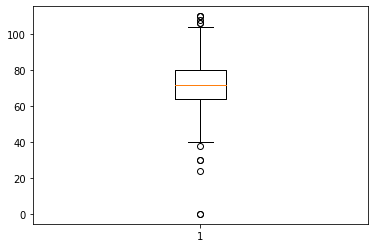

In [0]:
out_BP=plt.boxplot(training['BloodPressure'])

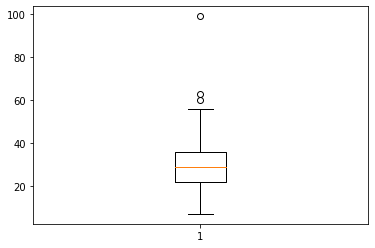

In [0]:
out_SkinThickness=plt.boxplot(training['SkinThickness'])

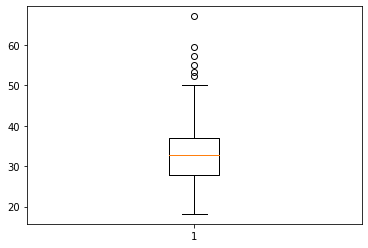

In [0]:
out_BMI=plt.boxplot(training['BMI'])

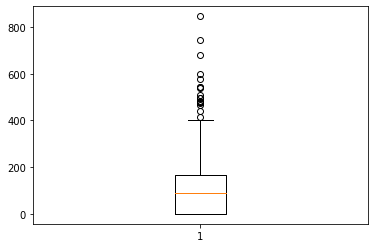

In [0]:
out_ins=plt.boxplot(training['Insulin'])

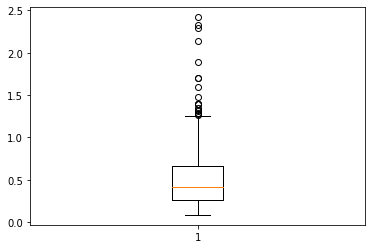

In [0]:
out_DPF=plt.boxplot(training['DiabetesPedigreeFunction'])

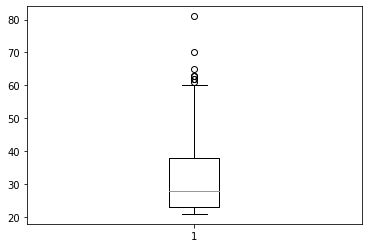

In [0]:
out_age=plt.boxplot(training['Age'])

In [0]:
col_names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [0]:
col_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

DETERMINATION OF INTERQUARTILE RANGE (iqr)

In [0]:
def outlier_analysis(col_names):
    print(col_names)
    ''' calculating outlier indices and replacing them with NA  '''
    #Extract quartiles
    q75, q25 = np.percentile(training[col_names], [75 ,25])
    print(q75,q25)
    #Calculate IQR
    iqr = q75 - q25
    #Calculate inner and outer fence
    minimum = q25 - (iqr*1.5)
    maximum = q75 + (iqr*1.5)
    print(minimum,maximum)
    #Replace with NA
    training.loc[training[col_names] < minimum,col_names] = np.nan
    training.loc[training[col_names] > maximum,col_names] = np.nan

In [0]:
outlier_analysis('Pregnancies')

Pregnancies
5.0 1.0
-5.0 11.0


In [0]:
training

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35,0,33.6,0.627,50,1
1,1.0,85,66,29,0,26.6,0.351,31,0
3,1.0,89,66,23,94,28.1,0.167,21,0
4,0.0,137,40,35,168,43.1,2.288,33,1
6,3.0,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...
761,9.0,170,74,31,0,44.0,0.403,43,1
763,10.0,101,76,48,180,32.9,0.171,63,0
764,2.0,122,70,27,0,36.8,0.340,27,0
765,5.0,121,72,23,112,26.2,0.245,30,0


In [0]:
training = pd.DataFrame(KNN(k = 29).fit_transform(training), columns = training.columns, index=training.index)

Imputing row 1/539 with 0 missing, elapsed time: 0.071
Imputing row 101/539 with 0 missing, elapsed time: 0.072
Imputing row 201/539 with 0 missing, elapsed time: 0.073
Imputing row 301/539 with 0 missing, elapsed time: 0.076
Imputing row 401/539 with 0 missing, elapsed time: 0.077
Imputing row 501/539 with 0 missing, elapsed time: 0.078


In [0]:
training.shape

(539, 9)

In [0]:
df_corr = training.loc[:,col_names]

In [0]:
df_corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0
...,...,...,...,...,...,...,...,...
761,9.0,170.0,74.0,31.0,0.0,44.0,0.403,43.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0


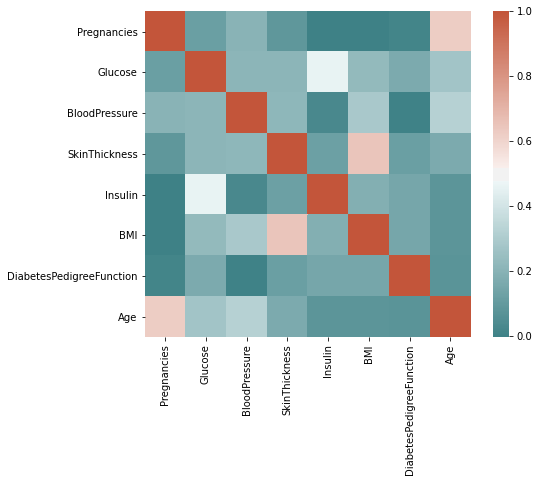

In [0]:
#Set the width and hieght of the plot
fun, ax = plt.subplots(figsize=(8, 6))

#Generate correlation matrix
cor_mat = df_corr.corr()

#Plot using seaborn library
sns.heatmap(cor_mat, mask=np.zeros_like(cor_mat, dtype=np.bool), cmap=sns.diverging_palette(200, 20, as_cmap=True),
            square=True, ax=ax)

In [0]:
#training = training.drop(['BMI','SkinThickness'], axis=1)

In [0]:
training = training.drop(['Age','Pregnancies'], axis=1)

In [0]:
training

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,148.0,72.0,35.0,0.0,33.6,0.627,1.0
1,85.0,66.0,29.0,0.0,26.6,0.351,0.0
3,89.0,66.0,23.0,94.0,28.1,0.167,0.0
4,137.0,40.0,35.0,168.0,43.1,2.288,1.0
6,78.0,50.0,32.0,88.0,31.0,0.248,1.0
...,...,...,...,...,...,...,...
761,170.0,74.0,31.0,0.0,44.0,0.403,1.0
763,101.0,76.0,48.0,180.0,32.9,0.171,0.0
764,122.0,70.0,27.0,0.0,36.8,0.340,0.0
765,121.0,72.0,23.0,112.0,26.2,0.245,0.0


In [0]:
training.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,119.858998,71.204082,29.176252,113.538033,32.895733,0.502451,0.333952
std,32.946653,13.027106,10.489706,122.861998,6.871851,0.343215,0.472061
min,0.000000,0.000000,7.000000,0.000000,18.200000,0.085000,0.000000
25%,97.000000,64.000000,22.000000,0.000000,27.850000,0.259000,0.000000
50%,115.000000,72.000000,29.000000,90.000000,32.800000,0.415000,0.000000
75%,140.500000,80.000000,36.000000,165.000000,36.900000,0.659000,1.000000
max,199.000000,110.000000,99.000000,846.000000,67.100000,2.420000,1.000000


In [0]:
col_names=['BMI','Glucose','BloodPressure','Insulin','DiabetesPedigreeFunction','SkinThickness']

feature sampling

In [0]:
for i in col_names:
    print(i)
    training[i] = (training[i] - min(training[i]))/(max(training[i]) - min(training[i]))

BMI
Glucose
BloodPressure
Insulin
DiabetesPedigreeFunction
SkinThickness


LOGISTIC REGRESSION

In [0]:
Sample_Index = np.random.rand(len(training)) < 0.8

train = training [Sample_Index]
test = training [~Sample_Index]

In [0]:
train_cols = training.columns[1:6]

In [0]:
#Built Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(training['Outcome'], training[train_cols]).fit()


Optimization terminated successfully.
         Current function value: 0.601885
         Iterations 5


In [0]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

In [0]:
#Build confusion matrix
CM = pd.crosstab(test['Outcome'], test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


ACCURACY LOGISTIC REGRESSION

In [0]:
((TP+TN)*100)/(TP+TN+FP+FN)


65.83333333333333

FNR LOGISTIC REGRESSION![alt text](https://)

In [0]:
(FN*100)/(FN+TP)

71.42857142857143

In [0]:
%matplotlib inline  

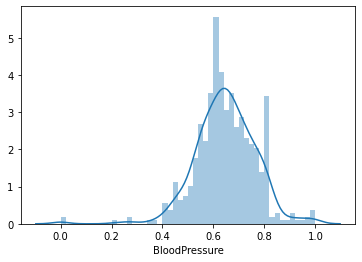

In [0]:
sns.distplot(training['BloodPressure'],bins=50)

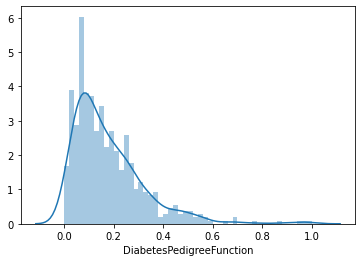

In [0]:
sns.distplot(training['DiabetesPedigreeFunction'],bins=50)

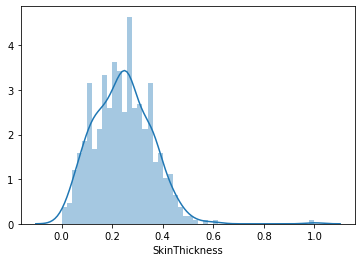

In [0]:
sns.distplot(training['SkinThickness'],bins=50)

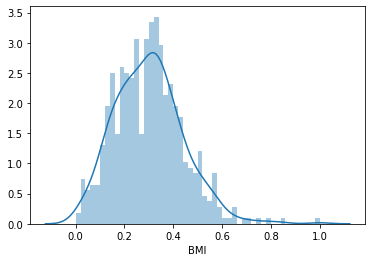

In [0]:
sns.distplot(training['BMI'],bins=50)

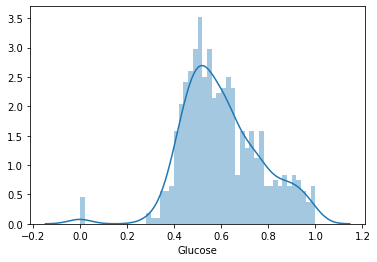

In [0]:
sns.distplot(training['Glucose'],bins=50)

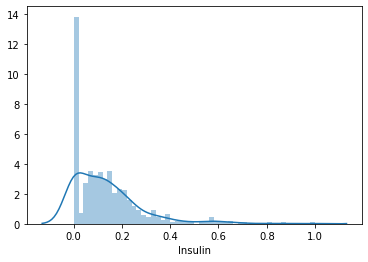

In [0]:
sns.distplot(training['Insulin'],bins=50)

In [0]:
training.shape

(539, 7)

In [0]:
# sns.distplot(training['Pregnancies'],bins=50)

In [0]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [0]:
#!pip install sklearn

In [0]:
#replace target categories with Yes or No
training['Outcome'] = training['Outcome'].replace(0,'Non Diabetic')
training['Outcome'] = training['Outcome'].replace(1,'Diabetic')

In [0]:
training

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,0.743719,0.654545,0.304348,0.000000,0.314928,0.232120,Diabetic
1,0.427136,0.600000,0.239130,0.000000,0.171779,0.113919,Non Diabetic
3,0.447236,0.600000,0.173913,0.111111,0.202454,0.035118,Non Diabetic
4,0.688442,0.363636,0.304348,0.198582,0.509202,0.943469,Diabetic
6,0.391960,0.454545,0.271739,0.104019,0.261759,0.069807,Diabetic
...,...,...,...,...,...,...,...
761,0.854271,0.672727,0.260870,0.000000,0.527607,0.136188,Diabetic
763,0.507538,0.690909,0.445652,0.212766,0.300613,0.036831,Non Diabetic
764,0.613065,0.636364,0.217391,0.000000,0.380368,0.109208,Non Diabetic
765,0.608040,0.654545,0.173913,0.132388,0.163599,0.068522,Non Diabetic


In [0]:
X = training.values[:, 0:6]
Y = training.values[:,6]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

DECISION TREE

In [0]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)


In [0]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, C50_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


ACCURACY DECISION TREE

In [0]:
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

74.07407407407408

FNR DECISION TREE

In [0]:
(FN*100)/(FN+TP)

20.833333333333332

KNN CLASSIFIER

In [0]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 11).fit(X_train, y_train)

In [0]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [0]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]


Accuracy knn classifier

In [0]:
((TP+TN)*100)/(TP+TN+FP+FN)

76.85185185185185

FNR knn classifier

In [0]:
(FN*100)/(FN+TP)

15.277777777777779

FPR knn classifier

NAIVE BAYES

In [0]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [0]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [0]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100





ACCURACY ( BAYES)


In [0]:
((TP+TN)*100)/(TP+TN+FP+FN)

78.70370370370371

FNR(BAYES)


In [0]:
(FN*100)/(FN+TP)

13.88888888888889

RANDOM FOREST

In [0]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 500).fit(X_train, y_train)

In [0]:
RF_Predictions = RF_model.predict(X_test)

In [0]:
#build confusion matrix
 from sklearn.metrics import confusion_matrix 
 #CM = confusion_matrix(y_test, y_pred)
 CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]




In [0]:
#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

74.07407407407408

In [0]:
#FNR
(FN*100)/(FN+TP)

20.833333333333332